In [ ]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import os

from huggingface_hub import hf_hub_download, HfFileSystem, snapshot_download

sns.set_theme(
    palette=sns.color_palette("colorblind"),
    font="Times New Roman",
    font_scale=3.3,
    style="whitegrid",
)
sns.axes_style(
    style = {"axes.linewidth":4}
)

REPO = "boettiger-lab/rl4eco"
PATH_IN_REPO = "rl4fisheries-reproducing/eps/"
FS = HfFileSystem()

SAVE_LOC = "figures/"
SAVE_DATA = "data/"

In [ ]:
eps_csv_files = [
    os.path.basename(file) for file in FS.glob(
        REPO+"/"+PATH_IN_REPO+"*.csv"
    )
]

for filename in eps_csv_files:
    hf_hub_download(
        repo_id=REPO,
        filename=PATH_IN_REPO + filename,
        local_dir=SAVE_DATA
    )

DATA_LOC = "data/" + PATH_IN_REPO

In [51]:
directory_path = DATA_LOC
episode_dfs = {
    fname[:-4]: pd.read_csv(directory_path+fname)
    for fname in os.listdir(directory_path)
}

In [52]:
episode_dfs.keys()

dict_keys(['2o-RL-UM3-state', '1o-RL-UM1-action', 'Constr.-Prec.-UM3-state', '2o-RL-UM1-action', '1o-RL-UM2-state', 'Constr.-Prec.-UM3-action', 'Opt.-Prec.-UM3-state', 'Const.-Mort.-UM1-action', 'Opt.-Prec.-UM3-action', '2o-RL-UM2-state', '1o-RL-UM3-action', '2o-RL-UM3-action', 'Constr.-Prec.-UM2-state', 'Constr.-Prec.-UM1-action', '1o-RL-UM3-state', 'Const.-Mort.-UM3-action', 'Opt.-Prec.-UM2-state', 'Opt.-Prec.-UM1-action', 'Const.-Mort.-UM1-state', '2o-RL-UM1-state', 'Constr.-Prec.-UM2-action', 'Opt.-Prec.-UM2-action', 'Constr.-Prec.-UM1-state', 'Const.-Mort.-UM2-state', 'Opt.-Prec.-UM1-state', '2o-RL-UM2-action', 'Const.-Mort.-UM2-action', '1o-RL-UM1-state', '1o-RL-UM2-action', 'Const.-Mort.-UM3-state'])

In [53]:
policy_names = np.unique([
    fname[:-10] if fname[-10] == "-"
    else fname[:-11]
    for fname in os.listdir(directory_path)
])
policy_names = [str(pol_n) for pol_n in policy_names]
print(policy_names)

['1o-RL-UM1', '1o-RL-UM2', '1o-RL-UM3', '2o-RL-UM1', '2o-RL-UM2', '2o-RL-UM3', 'Const.-Mort.-UM1', 'Const.-Mort.-UM2', 'Const.-Mort.-UM3', 'Constr.-Prec.-UM1', 'Constr.-Prec.-UM2', 'Constr.-Prec.-UM3', 'Opt.-Prec.-UM1', 'Opt.-Prec.-UM2', 'Opt.-Prec.-UM3']


In [54]:
for fname, df in episode_dfs.items():
    if(fname[-5:]=="state"):
        df["variable type"] = "state"
    else:
        df["variable type"] = "action"
    
    

In [55]:
episode_dfs_new = {}

for policy in policy_names:
    policy_dfs = [pol for pol in episode_dfs.keys() if pol.startswith(policy)]
    episode_dfs_new[policy] = pd.concat([
        episode_dfs[key]
        for key in policy_dfs
    ])

In [56]:
for key in episode_dfs_new:
    episode_dfs_new[key].sort_values(by="variable type", inplace=True)

In [57]:
episode_dfs_new.keys()

dict_keys(['1o-RL-UM1', '1o-RL-UM2', '1o-RL-UM3', '2o-RL-UM1', '2o-RL-UM2', '2o-RL-UM3', 'Const.-Mort.-UM1', 'Const.-Mort.-UM2', 'Const.-Mort.-UM3', 'Constr.-Prec.-UM1', 'Constr.-Prec.-UM2', 'Constr.-Prec.-UM3', 'Opt.-Prec.-UM1', 'Opt.-Prec.-UM2', 'Opt.-Prec.-UM3'])

In [58]:
POLICY_NAME = {
    '1o-RL': '1 obs. RL', 
    '2o-RL': '2 obs. RL', 
    'Const.-Mort.': 'UMSY', 
    'Constr.-Prec.': 'cPP', 
    'Opt.-Prec.': 'oPP.',
}
episode_dfs_new_ = episode_dfs_new.copy()

for key, df in episode_dfs_new_.items():
    df['policy'] = POLICY_NAME[key[:-4]]
    name_transform = {'state': 'Observations', 'action': 'Exploitation Rate U'}
    df['variable type'] = df.apply(
        axis=1, # row wise
        func=lambda row: name_transform[row['variable type']]
    )
    df.sort_values(
        by='variable type',
        ascending=False,
        inplace=True,

    )


episodes_df_um1 = pd.concat(
    [df for key, df in episode_dfs_new.items() if key[-1]=='1'],
    ignore_index=True,
)
episodes_df_um2 = pd.concat(
    [df for key, df in episode_dfs_new.items() if key[-1]=='2'],
    ignore_index=True,
)

episodes_df_um3 = pd.concat(
    [df for key, df in episode_dfs_new.items() if key[-1]=='3'],
    ignore_index=True,
)

episodes_df_um1 = episodes_df_um1.drop(
        axis=1, #
        labels='Unnamed: 0',
    )

episodes_df_um2 = episodes_df_um2.drop(
        axis=1, #
        labels='Unnamed: 0',
    )

episodes_df_um3 = episodes_df_um3.drop(
        axis=1, #
        labels='Unnamed: 0',
    )

episodes_df_um1.sort_values(by=["variable"], inplace=True)
episodes_df_um2.sort_values(by=["variable"], inplace=True)
episodes_df_um3.sort_values(by=["variable"], inplace=True)




In [59]:

episodes_df_um1 = episodes_df_um1[episodes_df_um1.variable != 'utility']
episodes_df_um2 = episodes_df_um2[episodes_df_um2.variable != 'utility']
episodes_df_um3 = episodes_df_um3[episodes_df_um3.variable != 'utility']
episodes_df_um1['variable']


3799     biomass obs.
3604     biomass obs.
3603     biomass obs.
3602     biomass obs.
3601     biomass obs.
            ...      
3297    mean wt. obs.
3296    mean wt. obs.
3600    mean wt. obs.
3295    mean wt. obs.
3294    mean wt. obs.
Name: variable, Length: 6000, dtype: object

In [60]:
TITLE_X_LOC = 0.40

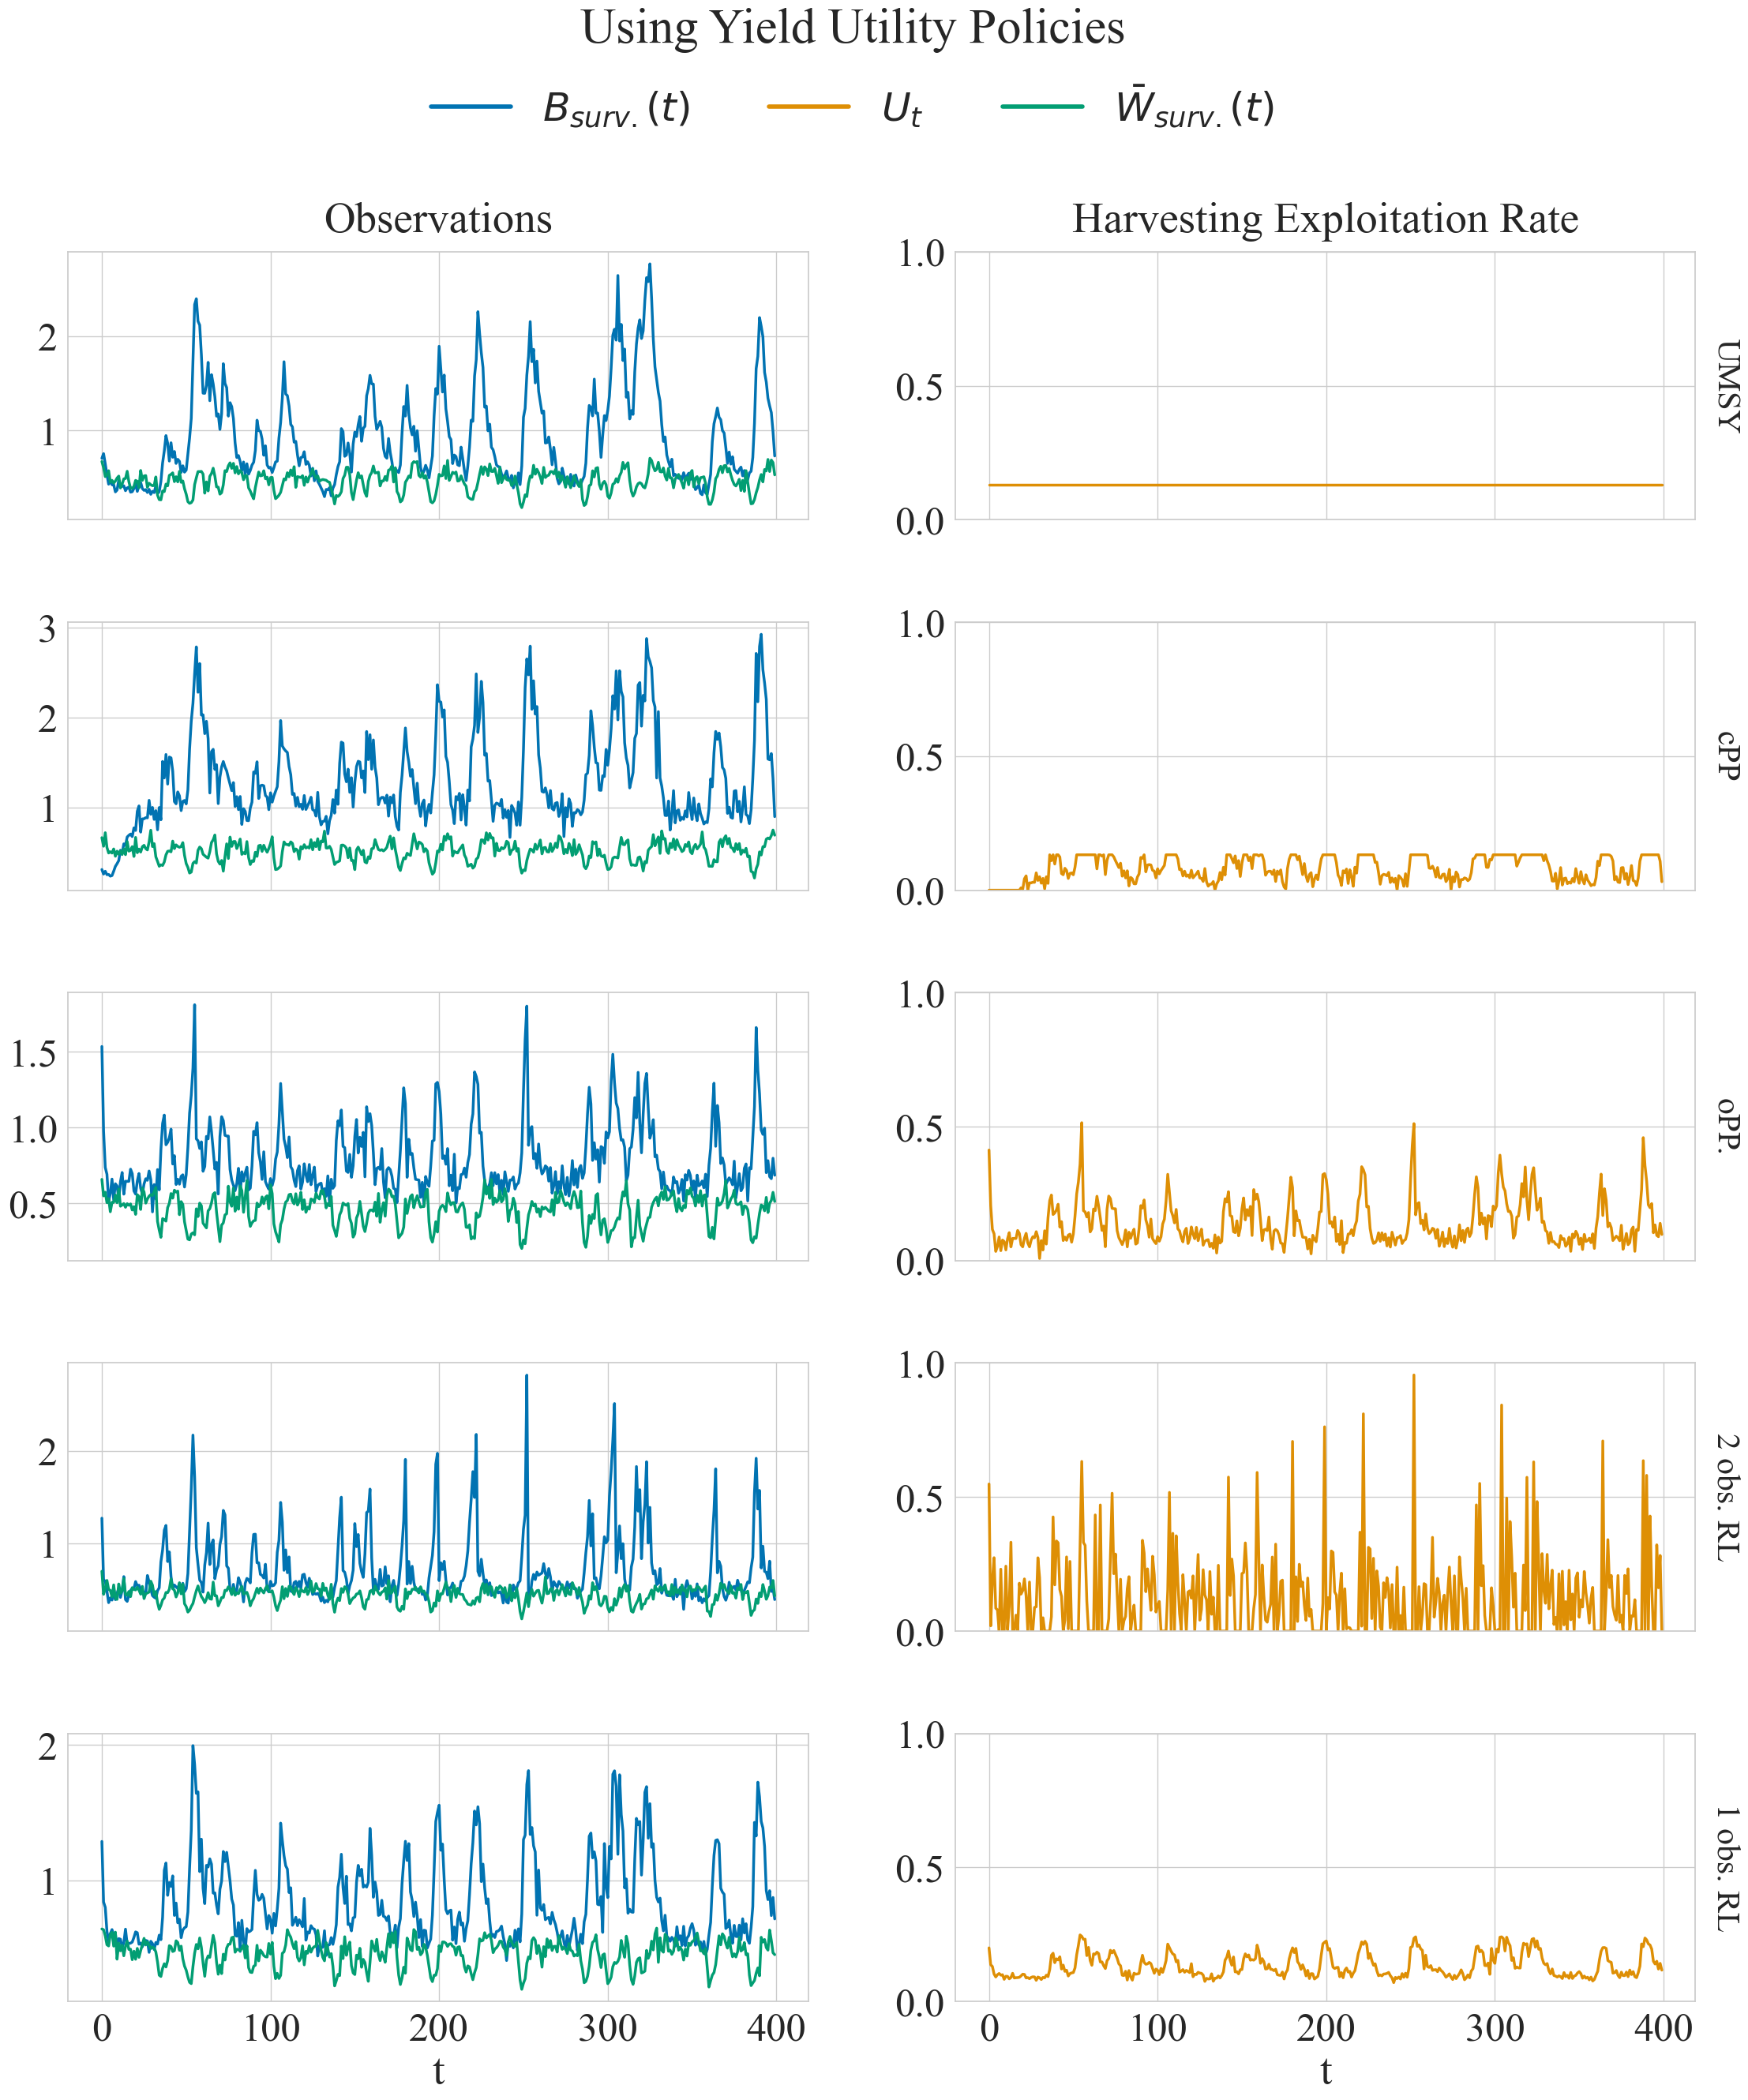

In [61]:

g= sns.relplot(
    episodes_df_um1, 
    y='value', 
    x='t',
    hue='variable', 
    col='variable type',
    row='policy',
    kind='line',
    linewidth=2.5,
    errorbar=None,
    facet_kws={'margin_titles':True, 'sharey': False, 'sharex': True},
    aspect=2.5,
).set_titles("")
g.tight_layout()

# g.figure.suptitle(TITLES[key], size=15)
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=30)
g.set_axis_labels("t", "")

new_legend_labels = [
    "$B_{surv.}(t)$",
    "$U_t$",
    "$\\bar{W}_{surv.}(t)$",
]
for newlabel, legend_text in zip(new_legend_labels,  g._legend.texts):
     legend_text.set_text(newlabel)

for idx, ax in enumerate(g.axes):
    ax[1].set_ylim(0, 1)
    if idx==0:
        ax[0].set_title(
            'Observations',
            y=1.05,
        )
        ax[1].set_title(
            'Harvesting Exploitation Rate',
            y=1.05,
        )

# g.add_legend(
#      labels=[
#           "$B_t$",
#           "$W_t$",
#           "$F_t$"
#      ]
# )
        
mpl.rcParams['axes.linewidth'] = 4
for idx, ax in enumerate(g.axes.ravel()):
        ax.spines['right'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.spines['bottom'].set_visible(True) 


g.figure.suptitle(
    "Using Yield Utility Policies", 
    size=45, 
    y=1.08, 
    x=TITLE_X_LOC,
)

sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.4, 1), ncol=3, title=None, frameon=False,
)

g.legend.get_lines()[0].set_linewidth(4)
g.legend.get_lines()[1].set_linewidth(4)
g.legend.get_lines()[2].set_linewidth(4)

g.savefig(SAVE_LOC + "/eps-um1.jpeg")
g


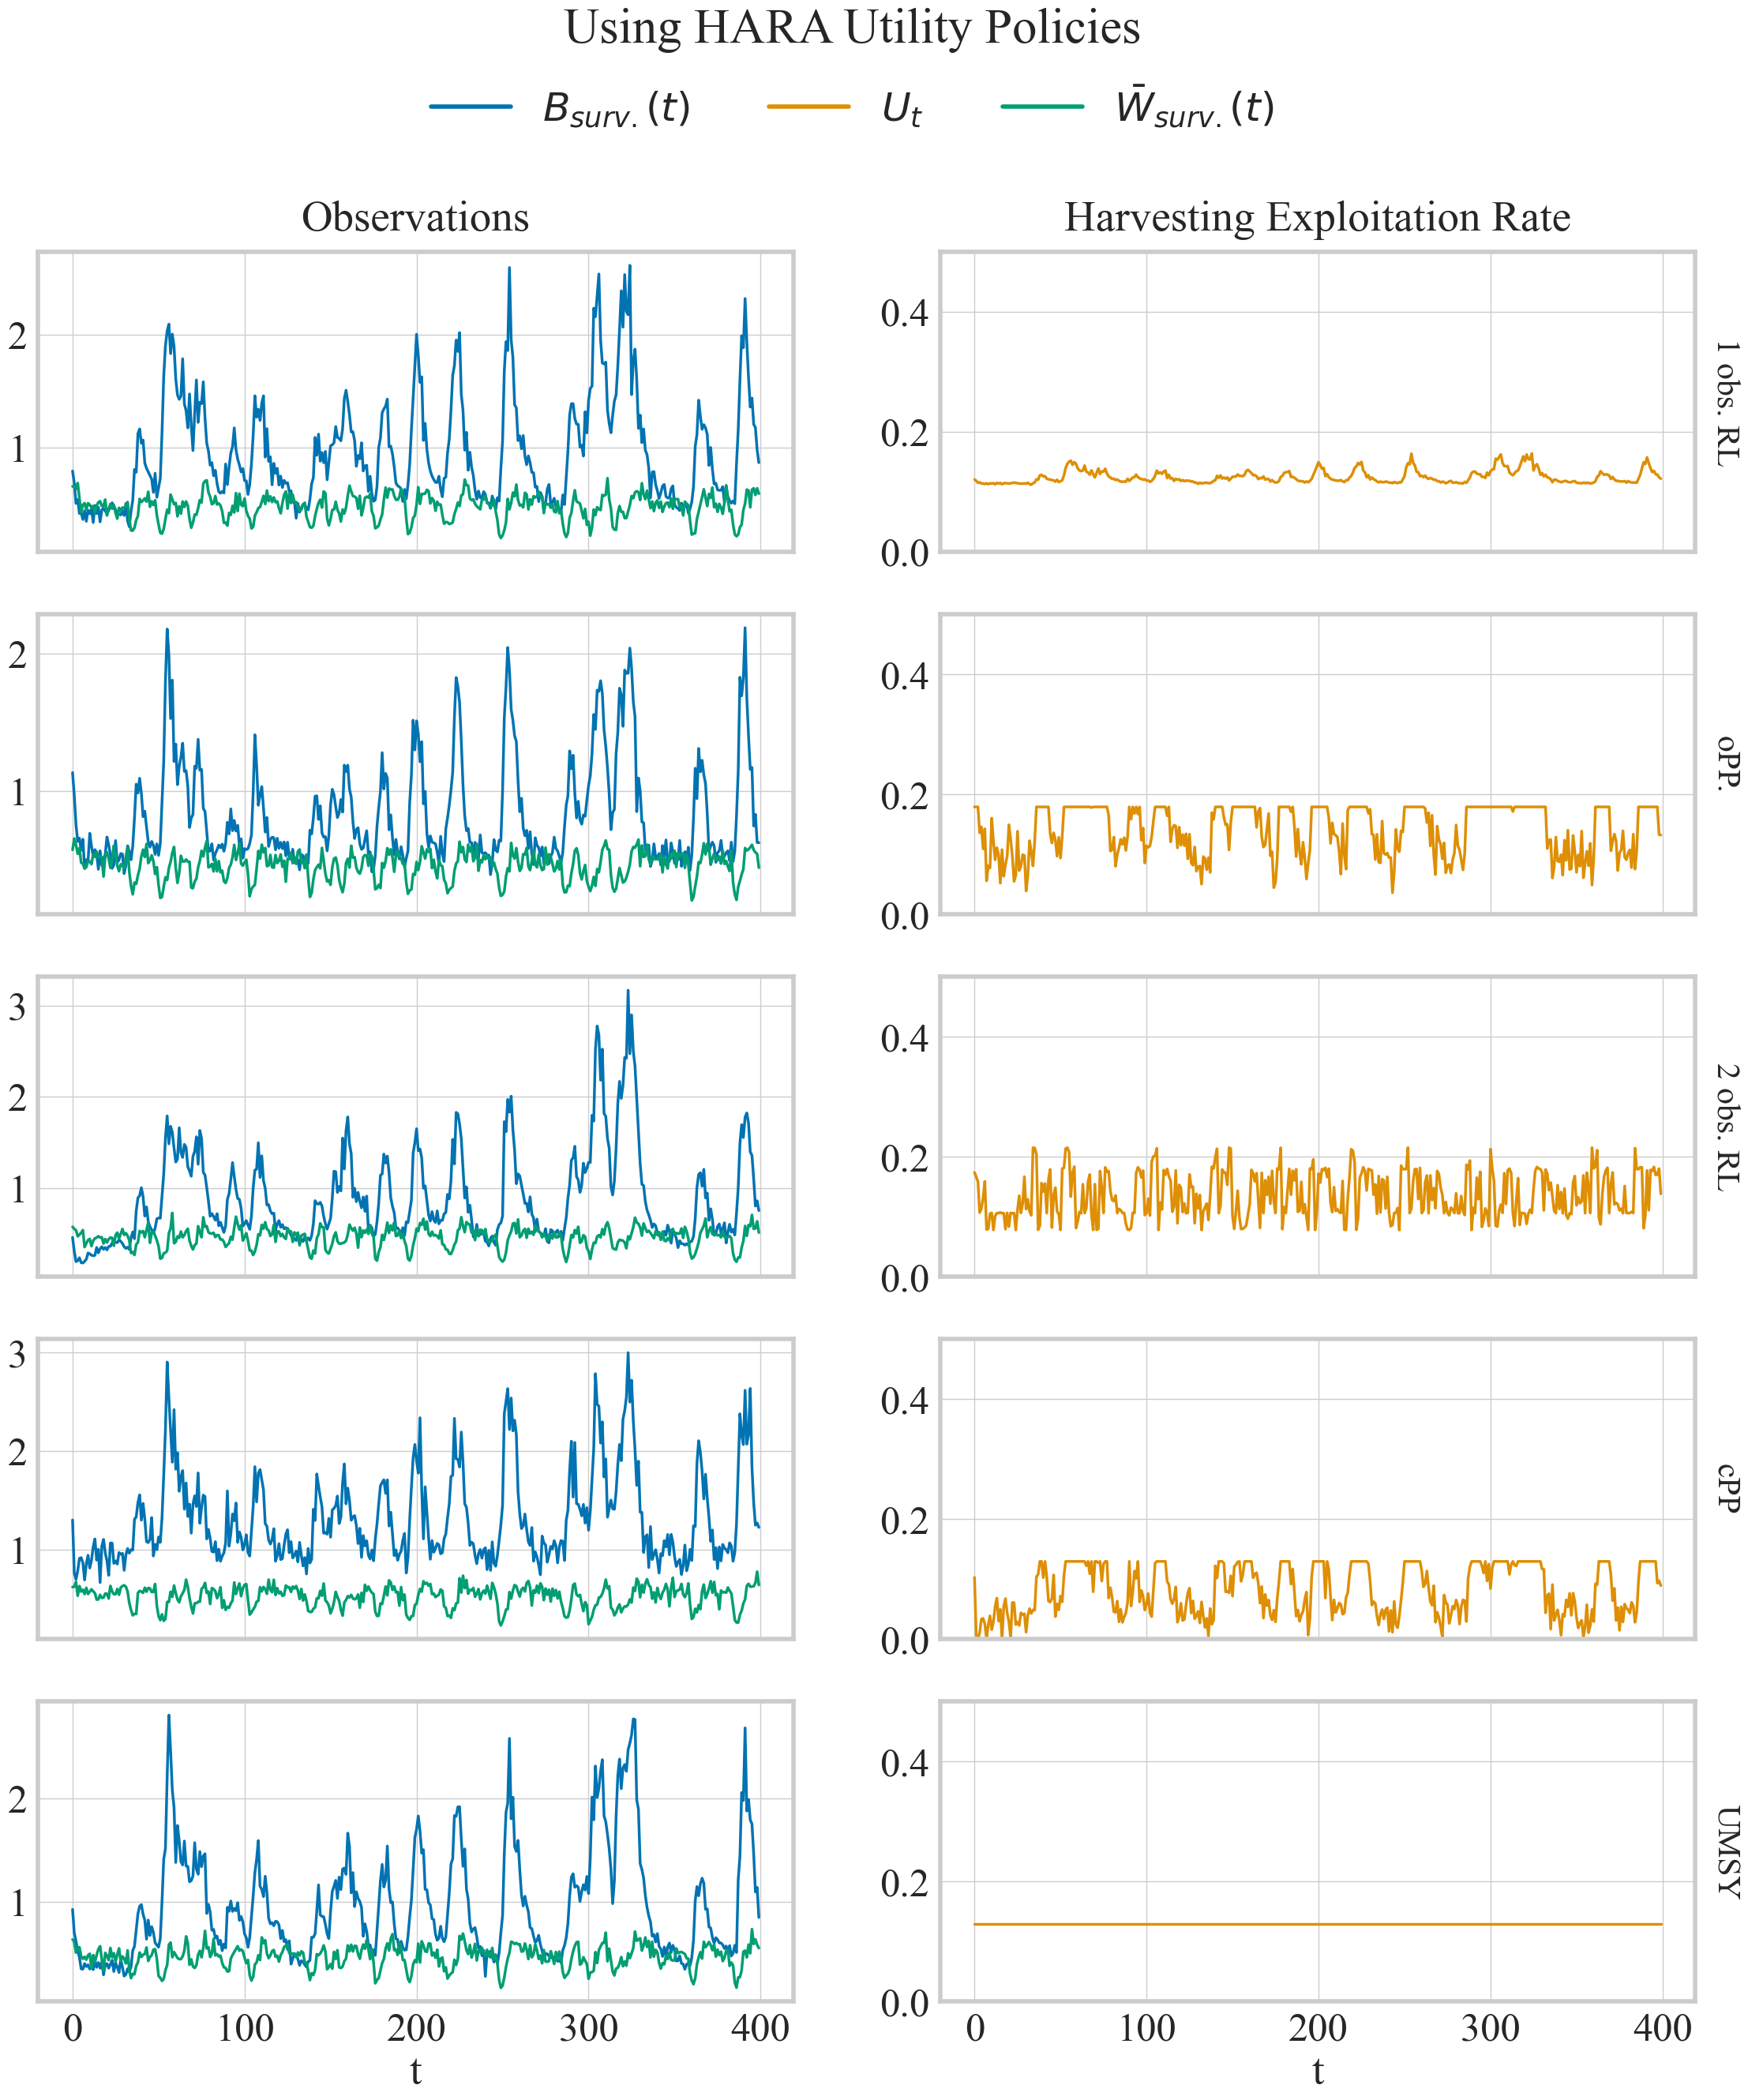

In [62]:
g = sns.relplot(
    episodes_df_um2, 
    y='value', 
    x='t',
    hue='variable', 
    col='variable type',
    row='policy',
    kind='line',
    linewidth=2.5,
    errorbar=None,
    facet_kws={'margin_titles':True, 'sharey': False, 'sharex': True},
    aspect=2.5,
).set_titles("")
g.tight_layout()
# g.figure.suptitle(TITLES[key], size=15)
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=30)
g.set_axis_labels("t", "")

new_legend_labels = [
    "$B_{surv.}(t)$",
    "$U_t$",
    "$\\bar{W}_{surv.}(t)$",
]
for newlabel, legend_text in zip(new_legend_labels,  g._legend.texts):
     legend_text.set_text(newlabel)

for idx, ax in enumerate(g.axes):
    ax[1].set_ylim(0, 0.5)
    if idx==0:
        ax[0].set_title(
            'Observations',
            y=1.05,
        )
        ax[1].set_title(
            'Harvesting Exploitation Rate',
            y=1.05,
        )
mpl.rcParams['axes.linewidth'] = 4
for idx, ax in enumerate(g.axes.ravel()):
        ax.spines['right'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.spines['bottom'].set_visible(True) 

g.figure.suptitle(
    "Using HARA Utility Policies", 
    size=45, 
    y=1.08, 
    x=TITLE_X_LOC,
)

sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.4, 1), ncol=3, title=None, frameon=False,
)

g.legend.get_lines()[0].set_linewidth(4)
g.legend.get_lines()[1].set_linewidth(4)
g.legend.get_lines()[2].set_linewidth(4)

g.savefig(SAVE_LOC + "/eps-um2.jpeg")
g


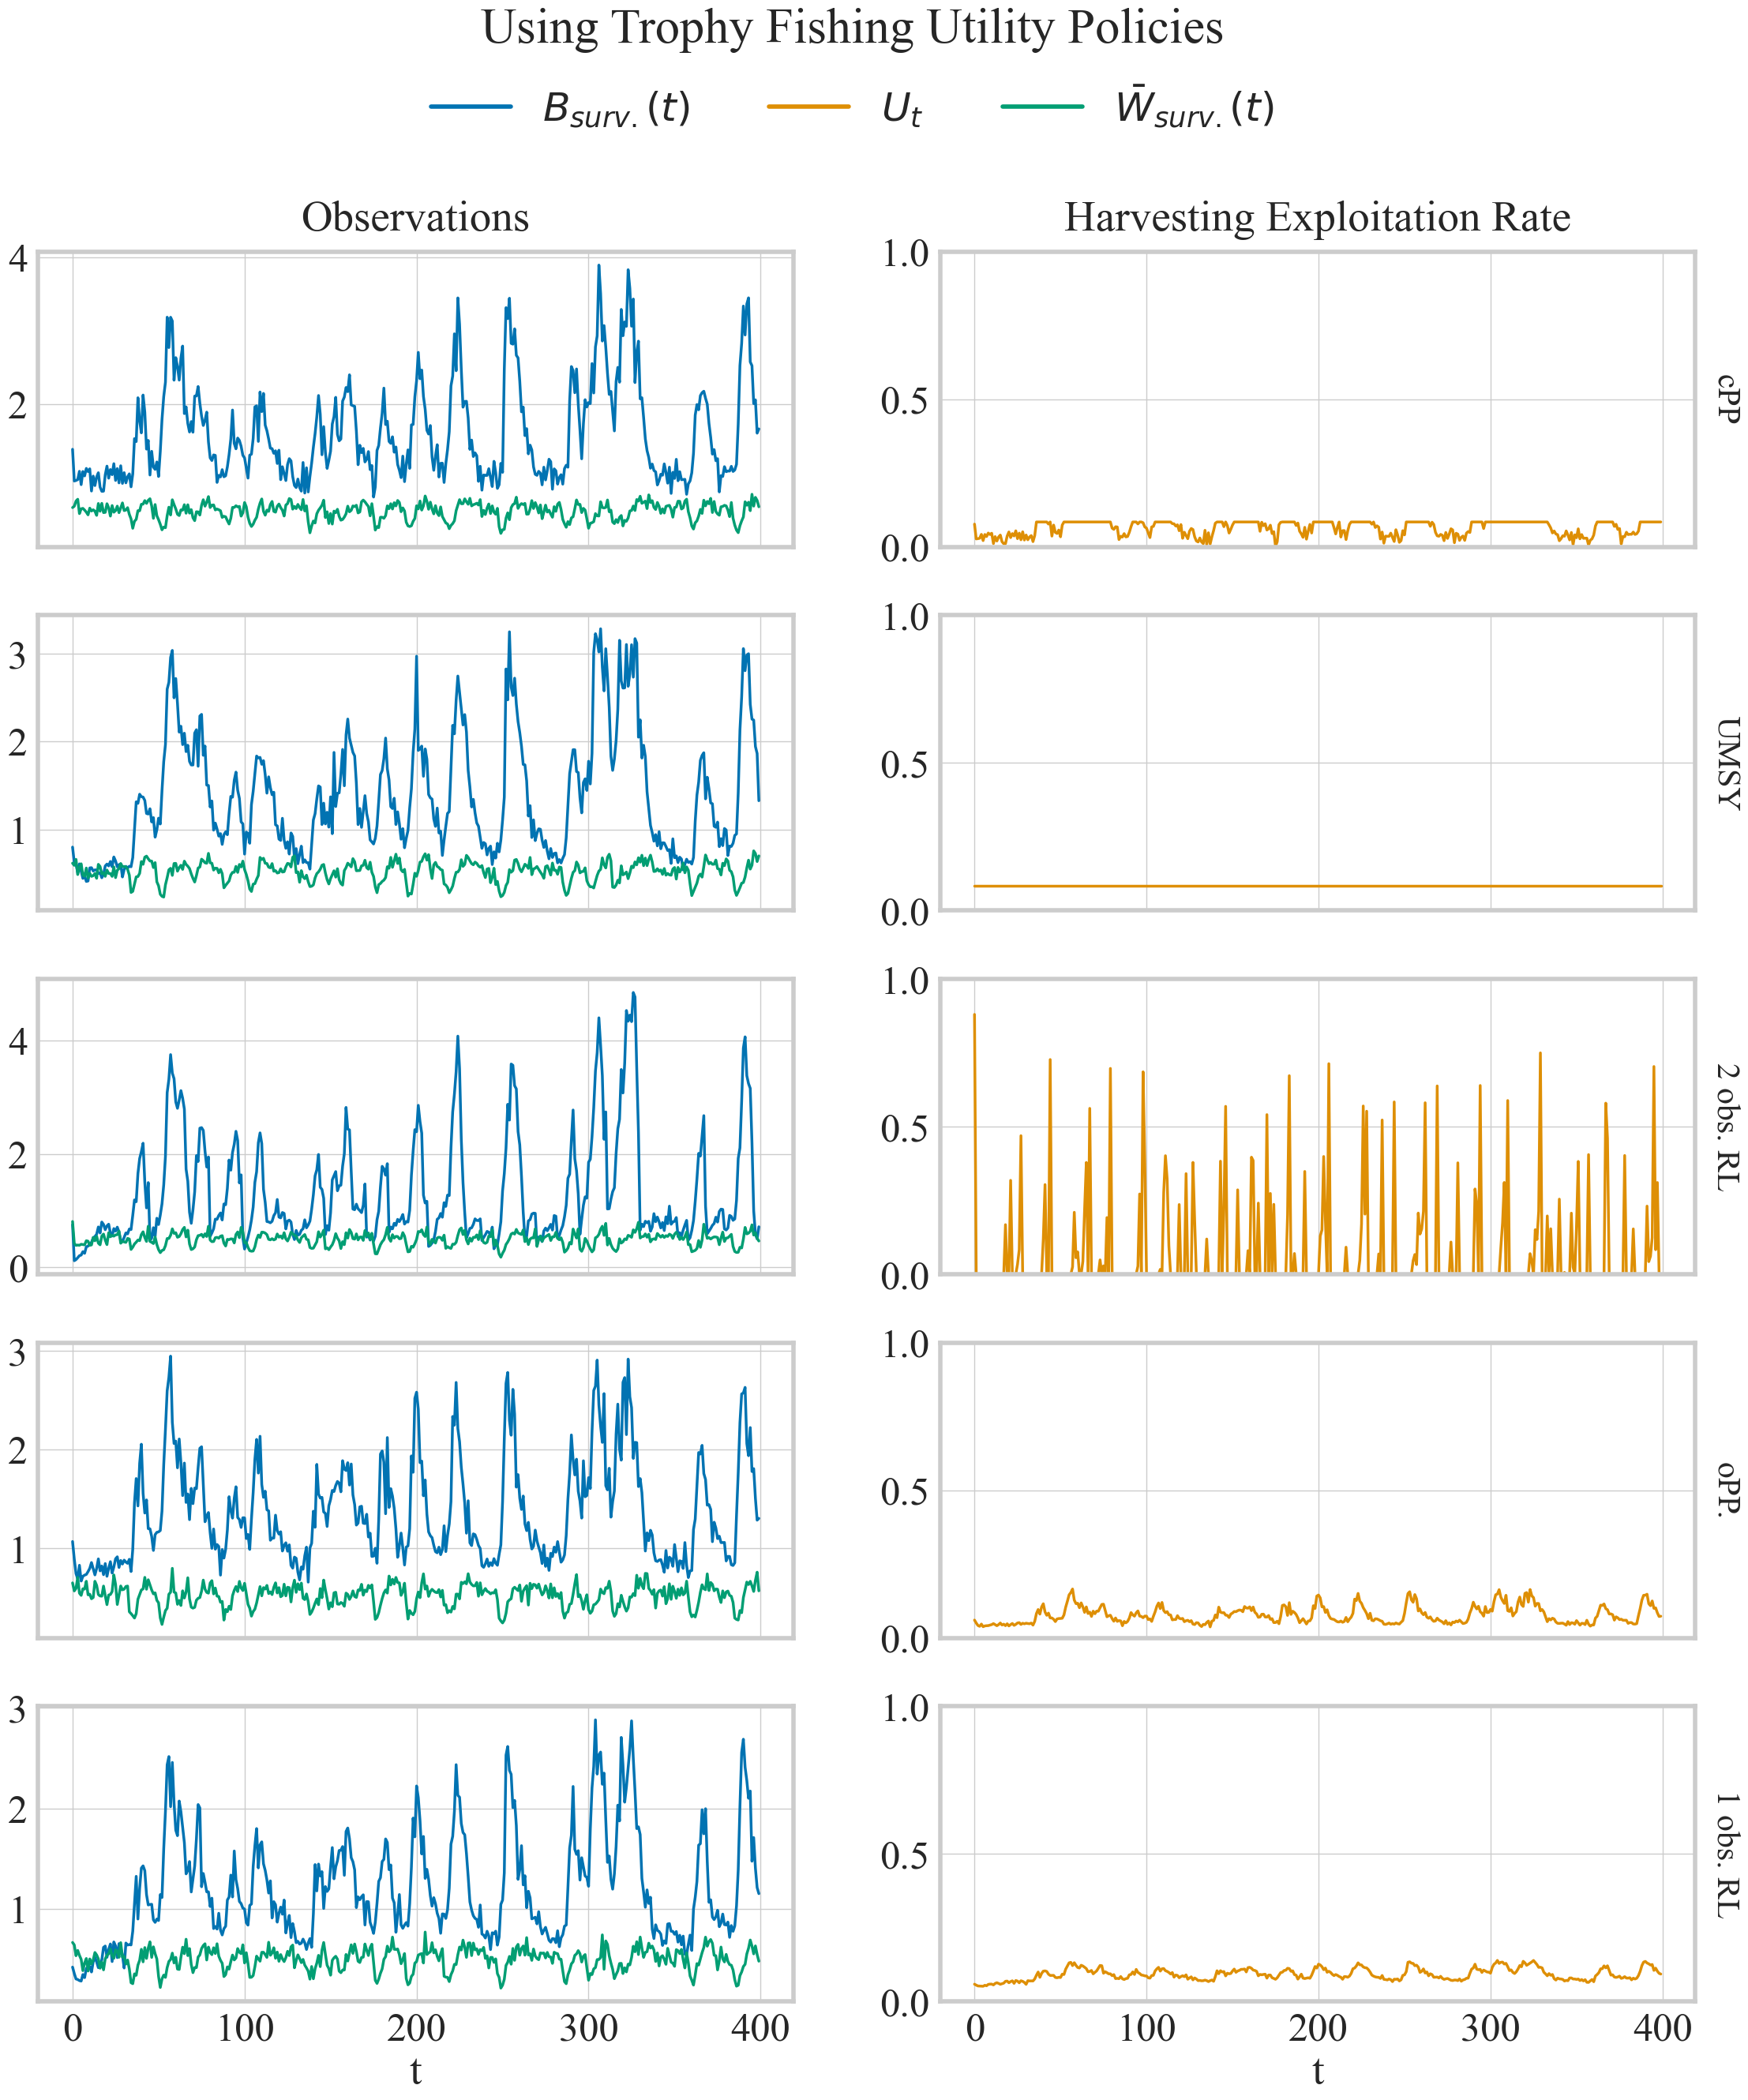

In [63]:
g = sns.relplot(
    episodes_df_um3, 
    y='value', 
    x='t',
    hue='variable', 
    col='variable type',
    row='policy',
    kind='line',
    linewidth=2.5,
    errorbar=None,
    facet_kws={'margin_titles':True, 'sharey': False, 'sharex': True},
    aspect=2.5,
).set_titles("")
g.tight_layout()
# g.figure.suptitle(TITLES[key], size=15)
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=30)
g.set_axis_labels("t", "")

new_legend_labels = [
    "$B_{surv.}(t)$",
    "$U_t$",
    "$\\bar{W}_{surv.}(t)$",
]
for newlabel, legend_text in zip(new_legend_labels,  g._legend.texts):
     legend_text.set_text(newlabel)

for idx, ax in enumerate(g.axes):
    ax[1].set_ylim(0, 1)
    if idx==0:
        ax[0].set_title(
            'Observations',
            y=1.05,
        )
        ax[1].set_title(
            'Harvesting Exploitation Rate',
            y=1.05,
        )
        
mpl.rcParams['axes.linewidth'] = 4
for idx, ax in enumerate(g.axes.ravel()):
        ax.spines['right'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.spines['bottom'].set_visible(True) 




g.figure.suptitle(
    "Using Trophy Fishing Utility Policies", 
    size=45, 
    y=1.08, 
    x=TITLE_X_LOC,
)

sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.4, 1), ncol=3, title=None, frameon=False,
)

g.legend.get_lines()[0].set_linewidth(4)
g.legend.get_lines()[1].set_linewidth(4)
g.legend.get_lines()[2].set_linewidth(4)

g.savefig(SAVE_LOC + "/eps-um3.jpeg")
g


In [64]:
g._legend

In [65]:
# taken from notebook in session used to create the csv data used
ZOOM_START = 280
ZOOM_END = 340

r_devs = np.array([ 31,  47,  49,  57,  66,  85, 100, 135, 145, 152, 173, 192, 213,
        216, 245, 246, 283, 292, 297, 301, 311, 317, 357, 382, 383, 398,
        399, 408, 415, 475, 485, 510, 516, 536, 570, 593, 610, 638, 640,
        661, 670, 672, 737, 762, 800, 830, 843, 850, 877, 940, 943, 954,
        985, 986, 995])

r_devs_zoom = [r for r in r_devs if r > ZOOM_START and r < ZOOM_END]


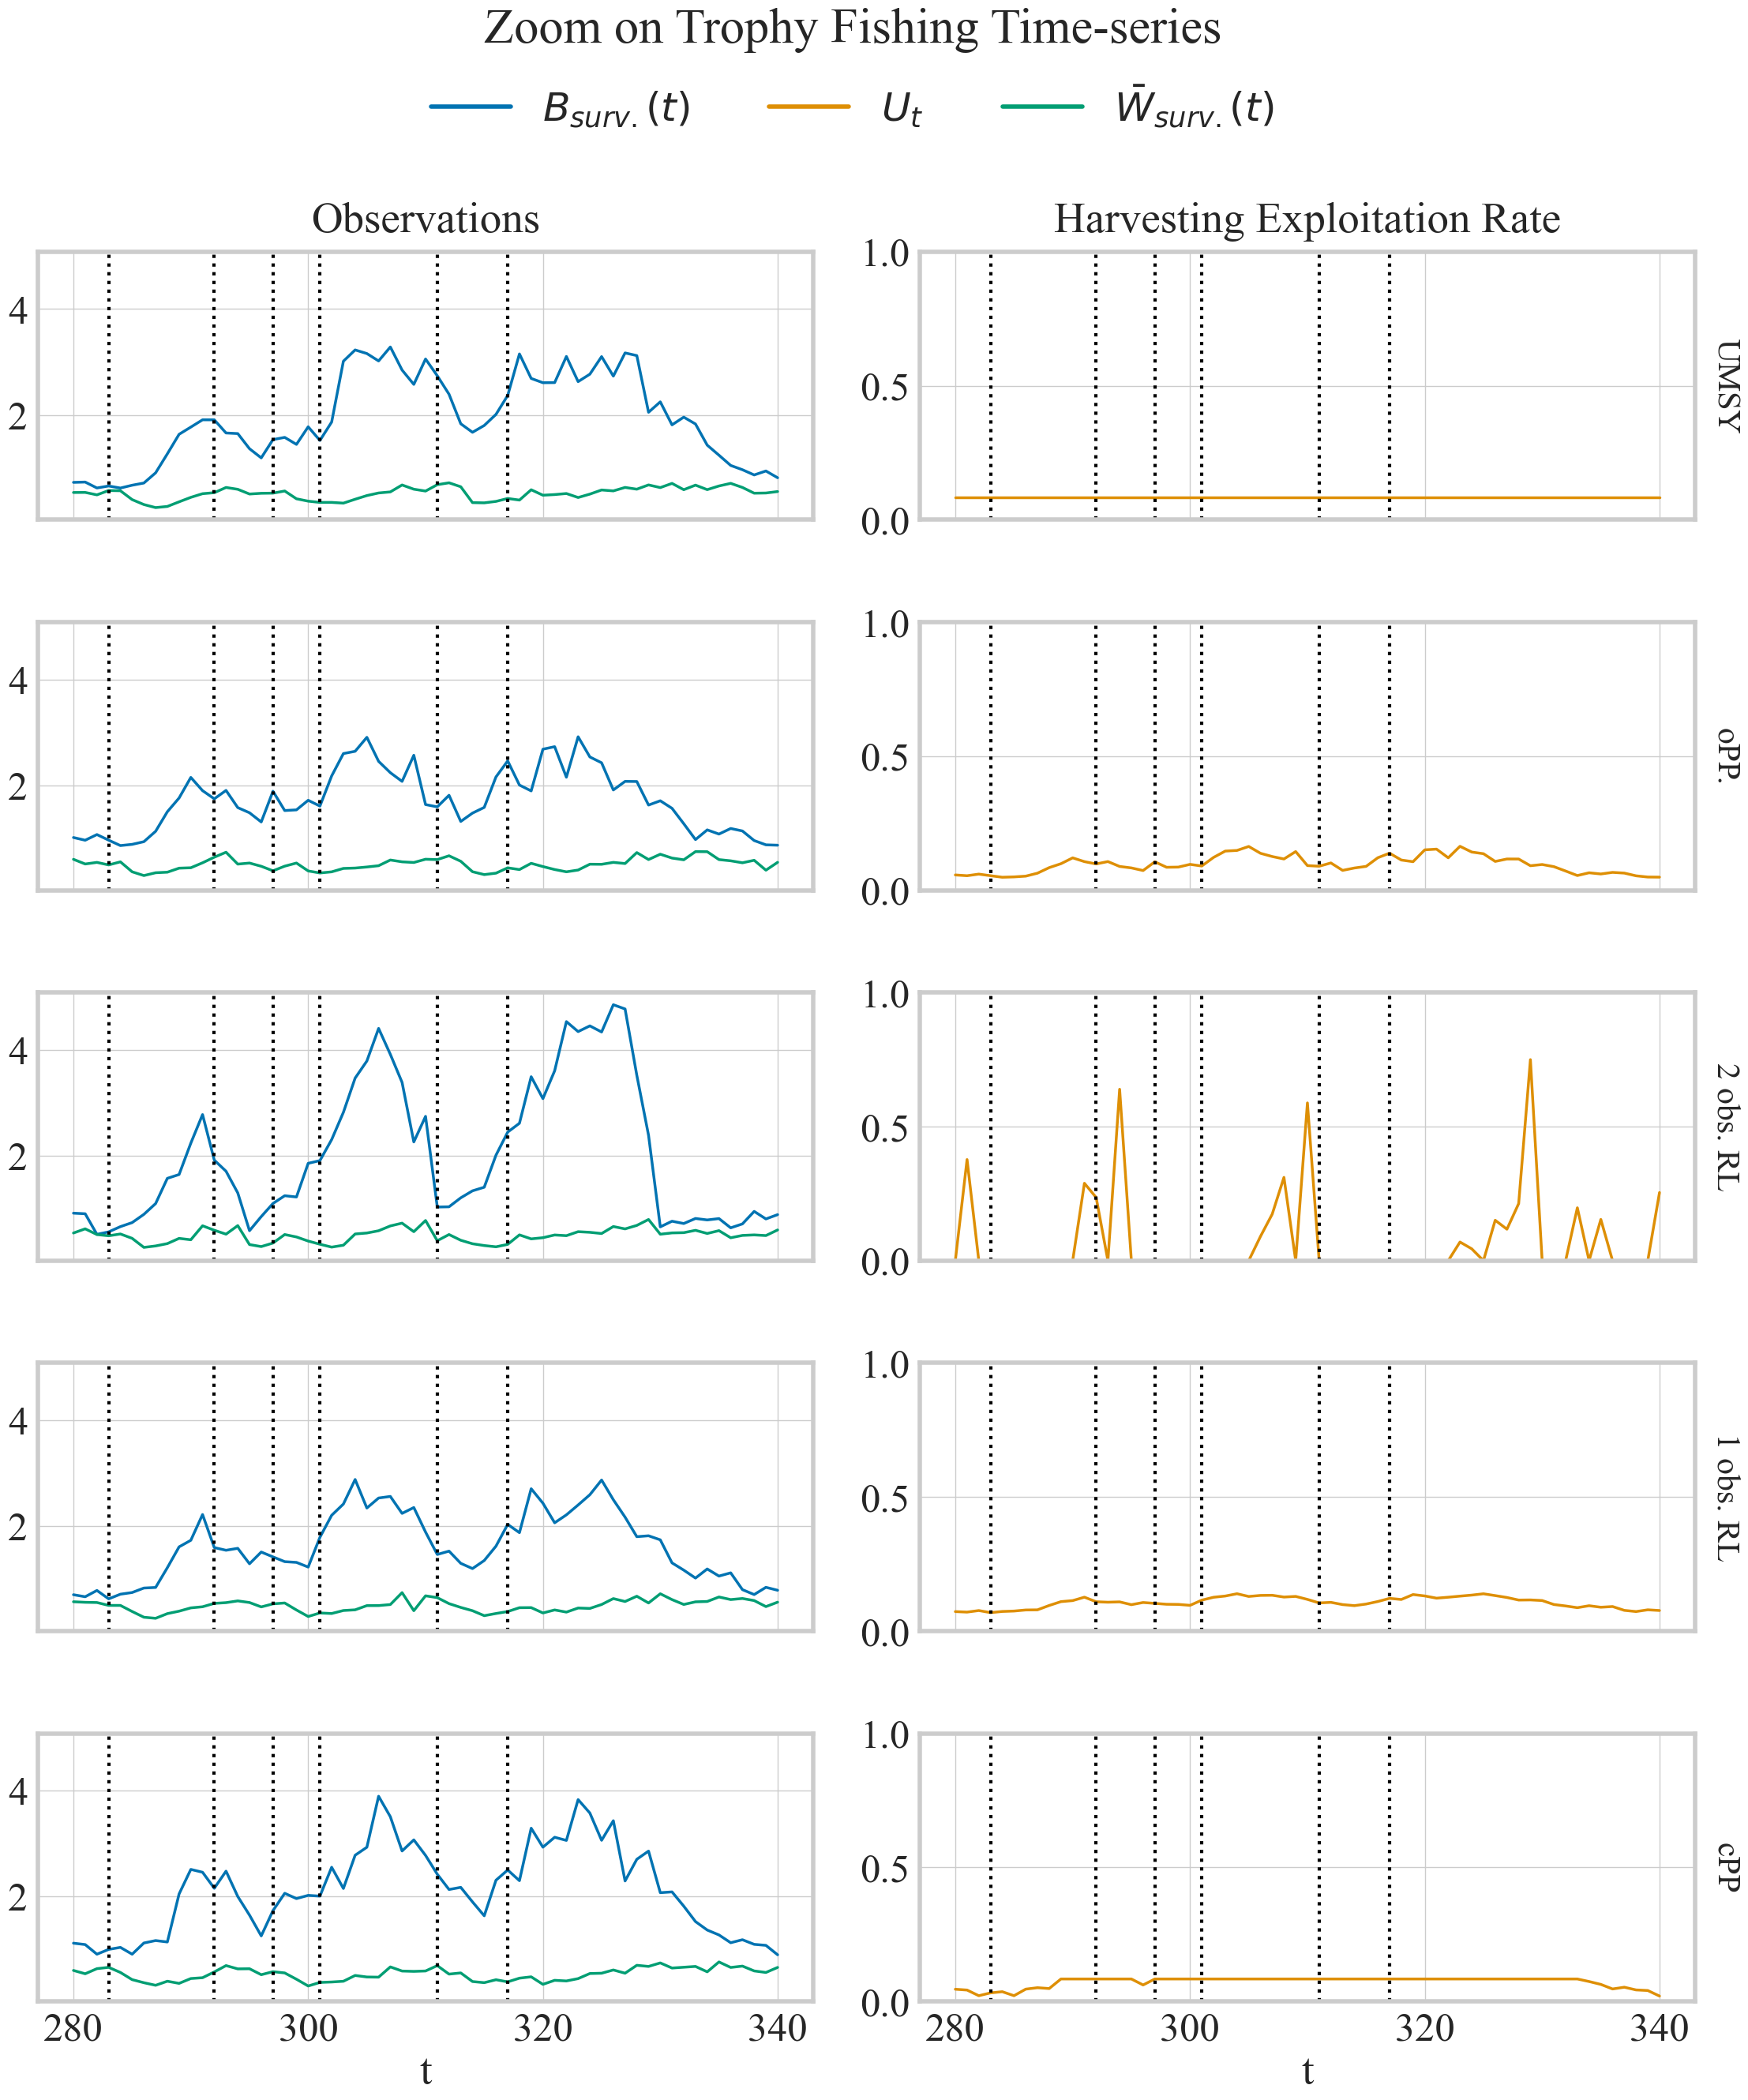

In [66]:
g = sns.relplot(
    episodes_df_um3[
        (episodes_df_um3.t >= ZOOM_START) &
        (episodes_df_um3.t <= ZOOM_END)
    ], 
    y='value', 
    x='t',
    hue='variable', 
    col='variable type',
    row='policy',
    kind='line',
    linewidth=2.5,
    errorbar=None,
    facet_kws={'margin_titles':True, 'sharey': 'col', 'sharex': True},
    aspect=2.5,
).set_titles("")
g.tight_layout()
# g.figure.suptitle(TITLES[key], size=15)
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=30)
g.set_axis_labels("t", "")

new_legend_labels = [
    "$B_{surv.}(t)$",
    "$U_t$",
    "$\\bar{W}_{surv.}(t)$",
]
for newlabel, legend_text in zip(new_legend_labels,  g._legend.texts):
     legend_text.set_text(newlabel)

for idx, ax in enumerate(g.axes):
    ax[1].set_ylim(0, 1)
    if idx==0:
        ax[0].set_title(
            'Observations',
            y=1.05,
        )
        ax[1].set_title(
            'Harvesting Exploitation Rate',
            y=1.05,
        )
        
mpl.rcParams['axes.linewidth'] = 4
for idx, ax in enumerate(g.axes.ravel()):
        ax.spines['right'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.spines['bottom'].set_visible(True) 
        for r in r_devs_zoom:
            ax.axvline(
                x=r,
                linestyle=':',
                linewidth=3.,
                color='black',
            )




g.figure.suptitle(
    "Zoom on Trophy Fishing Time-series", 
    size=45, 
    y=1.08, 
    x=TITLE_X_LOC,
)

sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.4, 1), ncol=3, title=None, frameon=False,
)

g.legend.get_lines()[0].set_linewidth(4)
g.legend.get_lines()[1].set_linewidth(4)
g.legend.get_lines()[2].set_linewidth(4)

g.savefig(SAVE_LOC + "/eps-um3-zoom.jpeg")
g
